In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
house_data = pd.read_csv('MagicBricks.csv')
house_data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [7]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


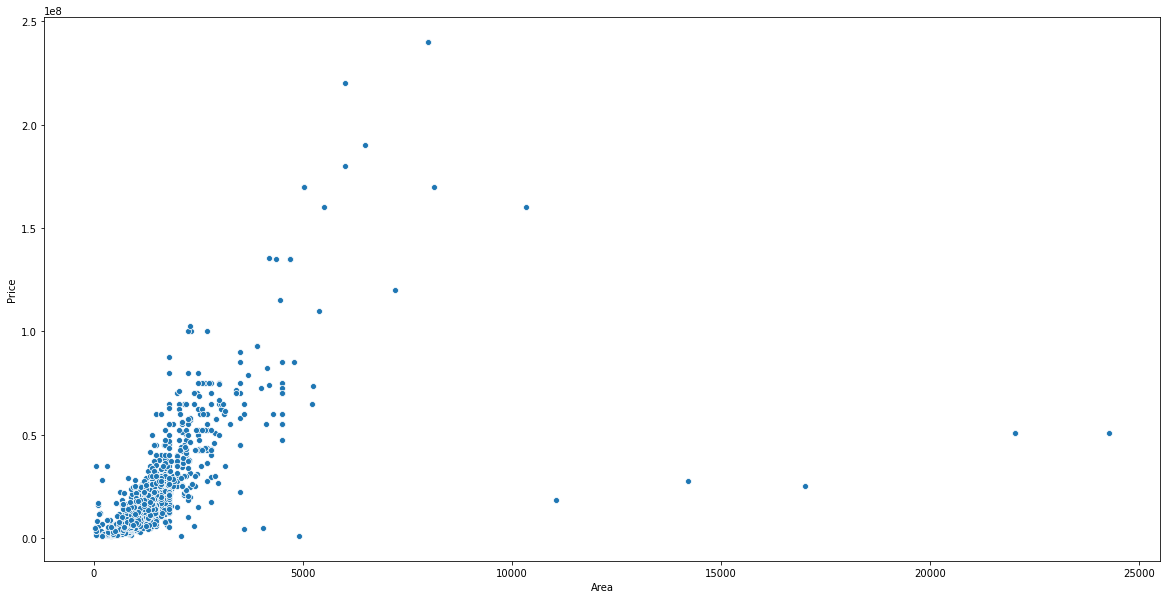

In [8]:
from pylab import rcParams
rcParams['figure.figsize']=20,10
sns.scatterplot(house_data['Area'], house_data['Price'])

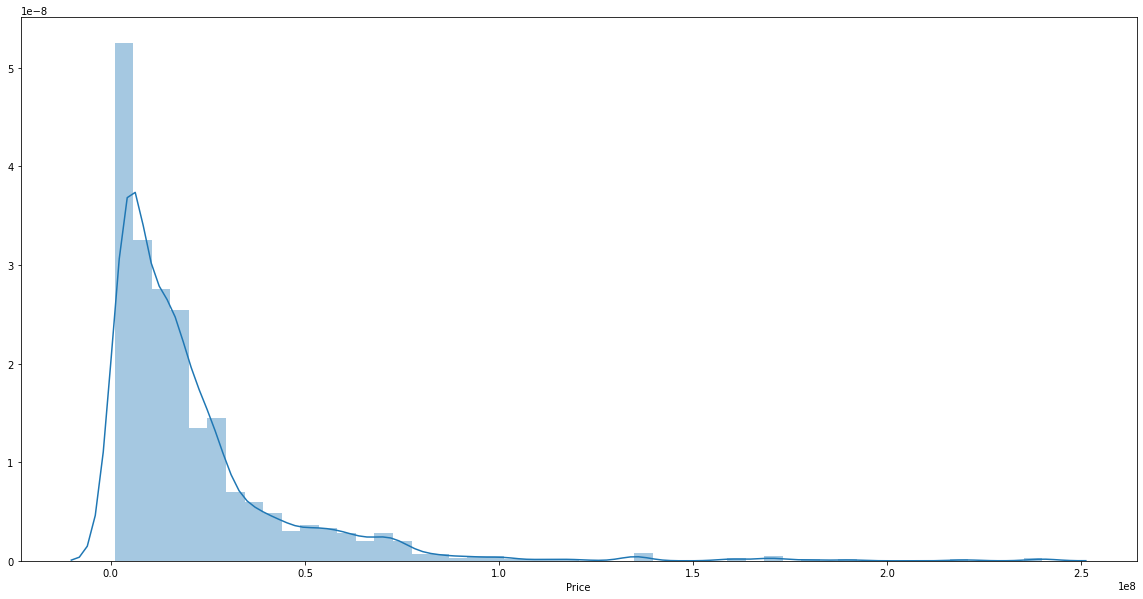

In [9]:
sns.distplot(house_data['Price'])

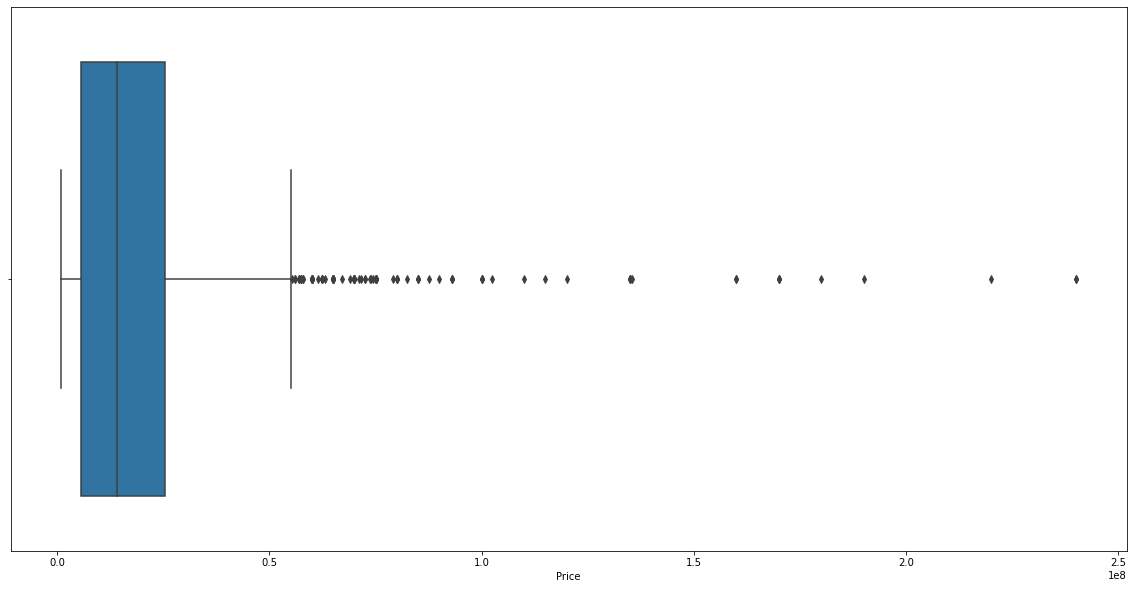

In [10]:
sns.boxplot(house_data['Price'])

In [ ]:
이상치가 존재하며, 데이터 분포가 정규분포와 같지 않은 것을 알 수 있다.

기존 선형회귀 분석

In [11]:
from sklearn.linear_model import LinearRegression
X=house_data[['Area']]
y=house_data['Price']
lr=LinearRegression()
lr.fit(X,y)
pred=lr.predict(X)

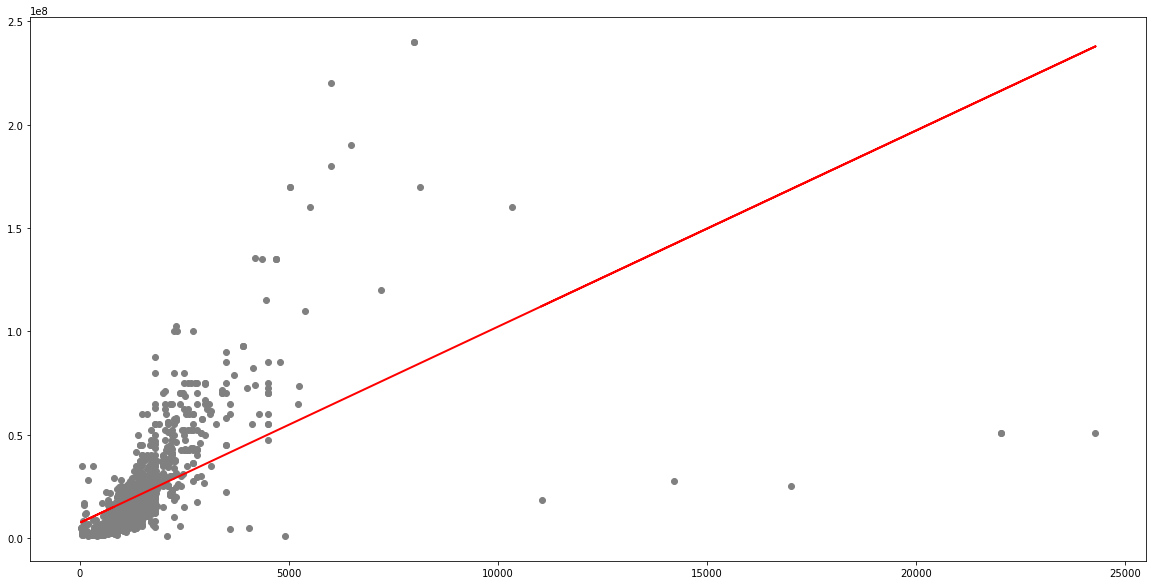

In [17]:
plt.scatter(X['Area'], y, color = 'gray')
plt.plot(X['Area'], pred, color='red', linewidth=2)
plt.show()

분위수 회귀 분석

In [24]:
import statsmodels.formula.api as Quantreg
mod=smf.quantreg('Price~Area', house_data)

In [27]:
quantiles=np.arange(.05,.96,.1) 

def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['Area']] +\
    res.conf_int().loc['Area'].tolist()
models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])

ols = smf.ols('Price ~ Area', house_data).fit()
ols_ci = ols.conf_int().loc['Area'].tolist()
ols = dict(a=ols.params['Intercept'],
          b = ols.params['Area'],
          lb= ols_ci[0],
          ub= ols_ci[1])
print(models)
print(ols)

C:\caba2015\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\caba2015\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


      q             a             b            lb            ub
0  0.05  8.636895e-02   2098.765429   1481.475601   2716.055257
1  0.15 -6.783116e+05   6396.247894   5969.242836   6823.252951
2  0.25 -3.508403e+06  11484.593838  11174.694776  11794.492899
3  0.35 -4.735484e+06  14301.075269  14004.763747  14597.386790
4  0.45 -5.759494e+06  16835.443038  16549.306418  17121.579657
5  0.55 -6.103448e+06  18773.946360  18502.222263  19045.670458
6  0.65 -6.947059e+06  21529.411764  21244.896578  21813.926950
7  0.75 -6.649025e+06  23286.908190  22965.450430  23608.365950
8  0.85 -7.408257e+06  27522.935780  27096.523941  27949.347619
9  0.95 -1.727358e+06  30215.919696  28918.983197  31512.856195
{'a': 7400145.699394269, 'b': 9483.12741675628, 'lb': 8747.712271676226, 'ub': 10218.542561836335}


C:\caba2015\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


분위수 회귀선 및 선형 회귀선 시각화

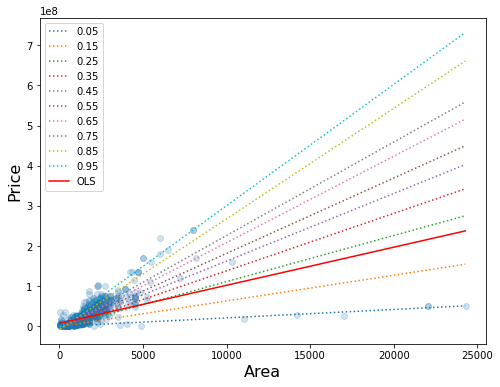

In [30]:
x= np.arange(house_data.Area.min(), house_data.Area.max(), 50)
get_y = lambda a,b : a+b*x

fig, ax = plt.subplots(figsize=(8,6))
for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x,y,linestyle='dotted', label=str(round(0.05+i*0.1,2)))
    
y = get_y(ols['a'], ols['b'])

ax.plot(x,y, color='red', label = 'OLS')
ax.scatter(house_data.Area, house_data.Price, alpha = .2)
legend= ax.legend()
ax.set_xlabel('Area', fontsize=16)
ax.set_ylabel('Price', fontsize=16);

In [ ]:
기존의 선형 회귀선은 30번째 백분위수 (a=0.3) 아래에 위치함을 알 수 있다.

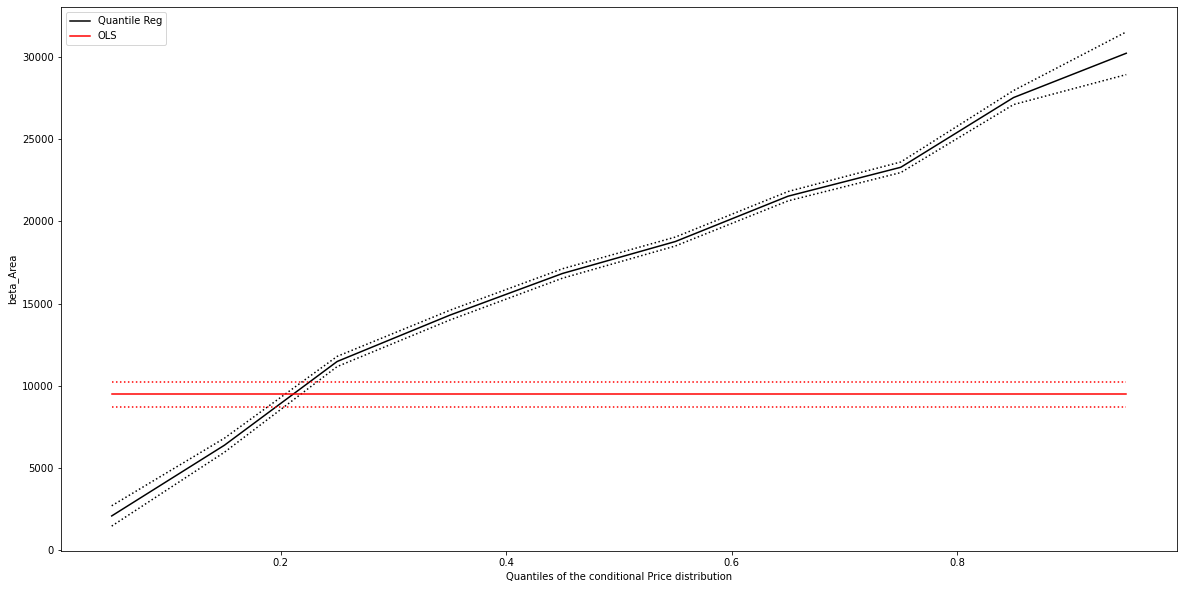

In [31]:
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color = 'black', label='Quantile Reg')
p2 = plt.plot(models.q, models.ub, linestyle= 'dotted', color = 'black')
p3 = plt.plot(models.q, models.lb, linestyle = 'dotted', color = 'black')
p4 = plt.plot(models.q, [ols['b']]*n, color = 'red', label='OLS' )
p5 = plt.plot(models.q, [ols['lb']]*n, linestyle='dotted', color = 'red')
p6 = plt.plot(models.q, [ols['ub']]*n, linestyle='dotted', color = 'red')
plt.ylabel('beta_Area')
plt.xlabel('Quantiles of the conditional Price distribution')
plt.legend()
plt.show()